In [189]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [241]:
rs = np.random.RandomState()

# Game logic

In [397]:
def add_next(curr, alphabet):
    next_char = alphabet[rs.randint(0, len(alphabet))]
    nxt = curr + [next_char]
    return nxt

def to_remove(curr):
    l = 1 + int(np.ceil(len(curr) / 2.))
    for i in range(0, l):
        if curr[-2*i:-i] == curr[-i:]:
            return i
    
    return 0

def check(curr):
    t_r = to_remove(curr)
    if t_r != 0:
        curr = curr[:-2 * t_r]
        
    return (t_r, curr)

# Game and vis

In [280]:
def play(rounds, alphabet):
    start = []
    curr = start

    removed_count = np.array([])
    length = np.array([])
    for i in range(0, rounds):
        curr = add_next(curr, alphabet)
        (removed, curr) = check(curr)
        removed_count = np.append(removed_count, [removed])
        length = np.append(length, [len(curr)])
        
    return (removed_count, length)

In [303]:
def plot_results(removed_count, length):
    sns.countplot(removed_count);
    plt.title('Histogram of removed element counts')
    plt.show();
    plt.plot(length);
    plt.title('Length of sequence')
    plt.show();
    plt.plot(np.cumsum(removed_count));
    plt.title('Cummulative sum of removed elements')
    plt.show();

# Game for alphabet of length 3

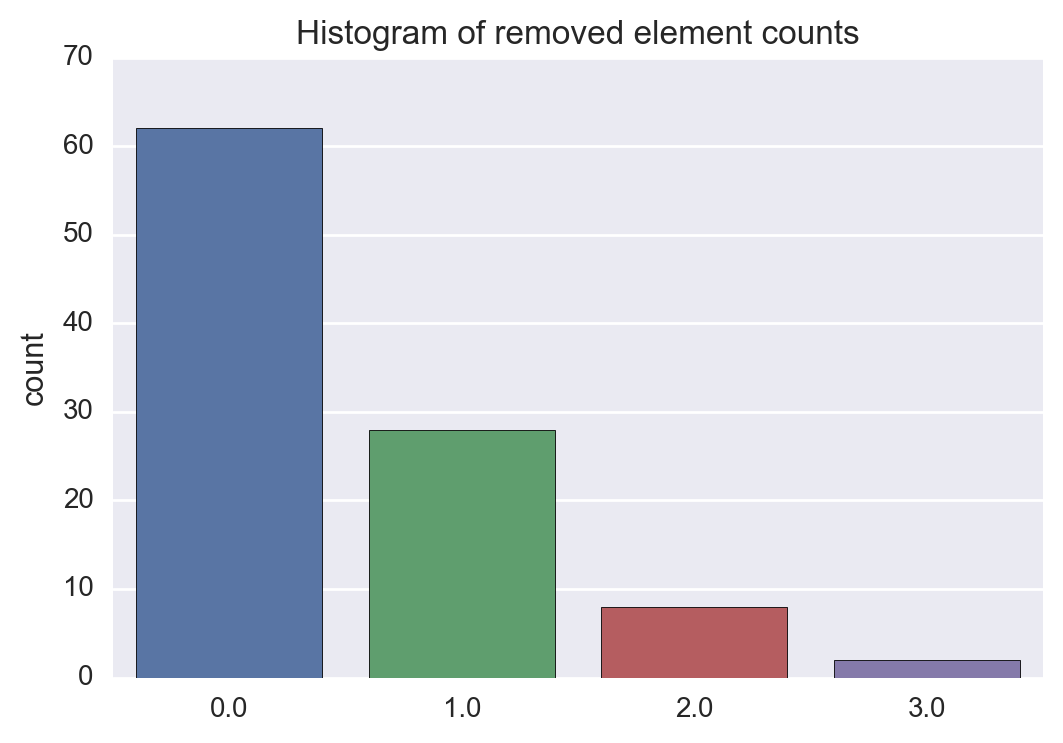

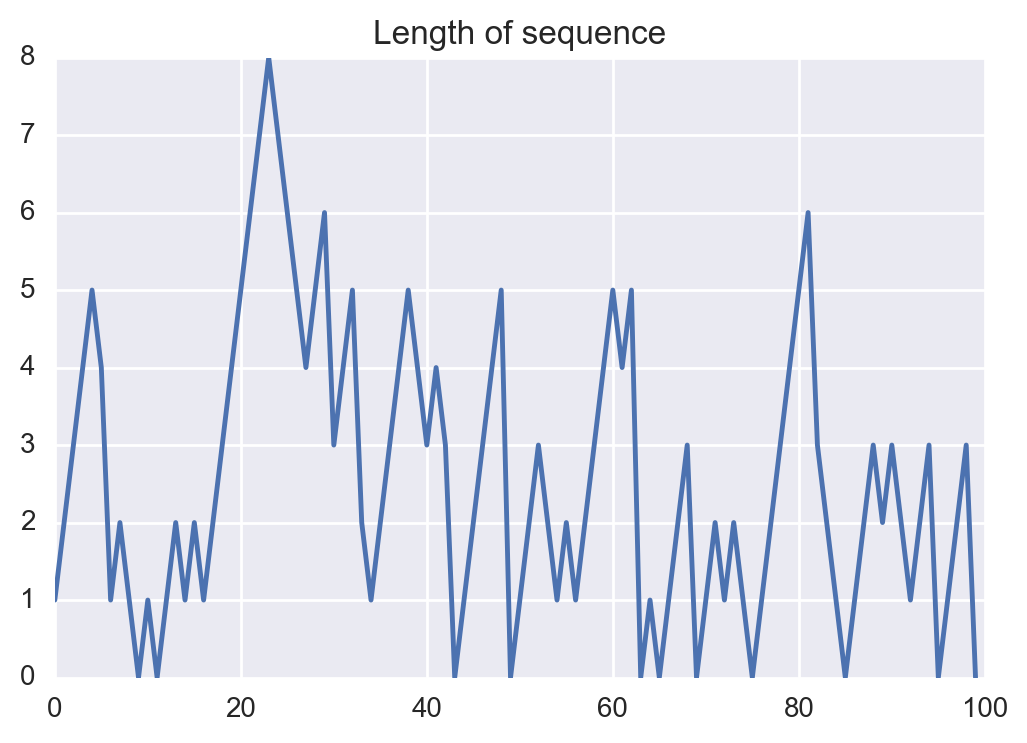

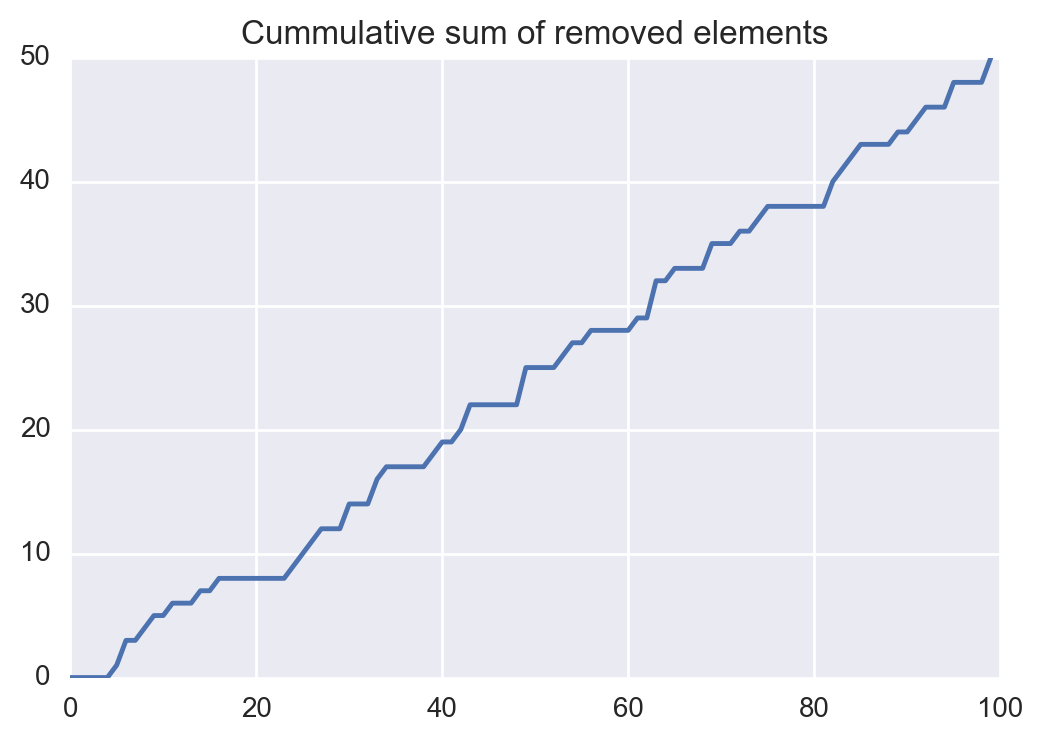

In [408]:
plot_results(*play(100, ['a', 'b', 'c']))

# Game for alphabet of length 4

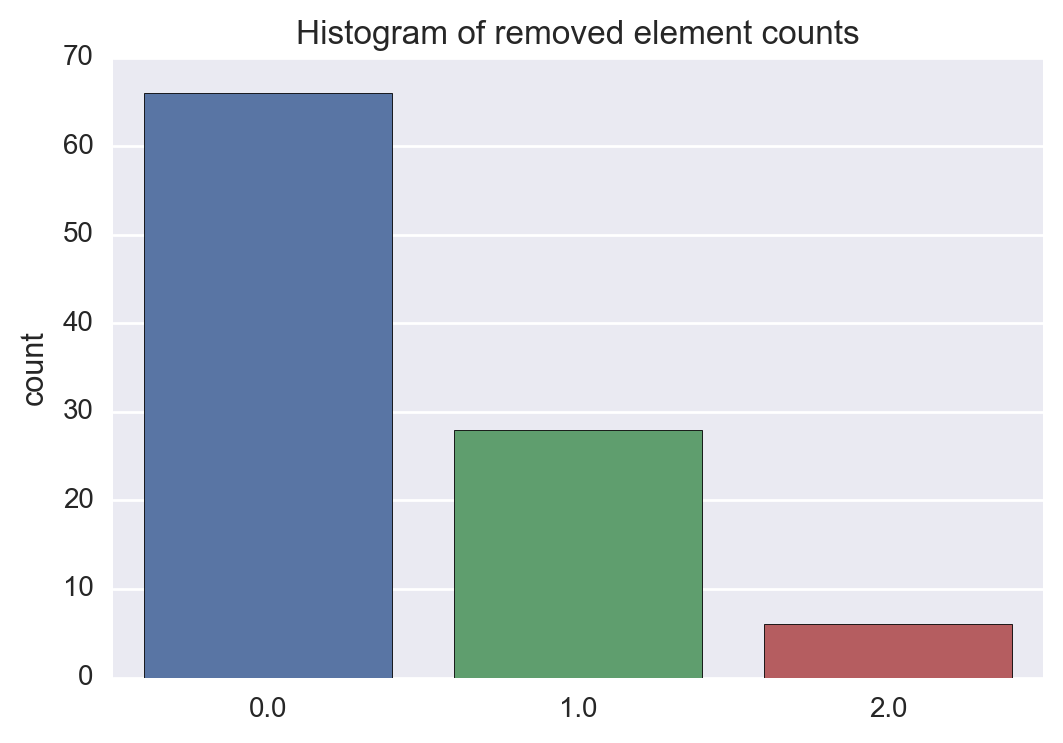

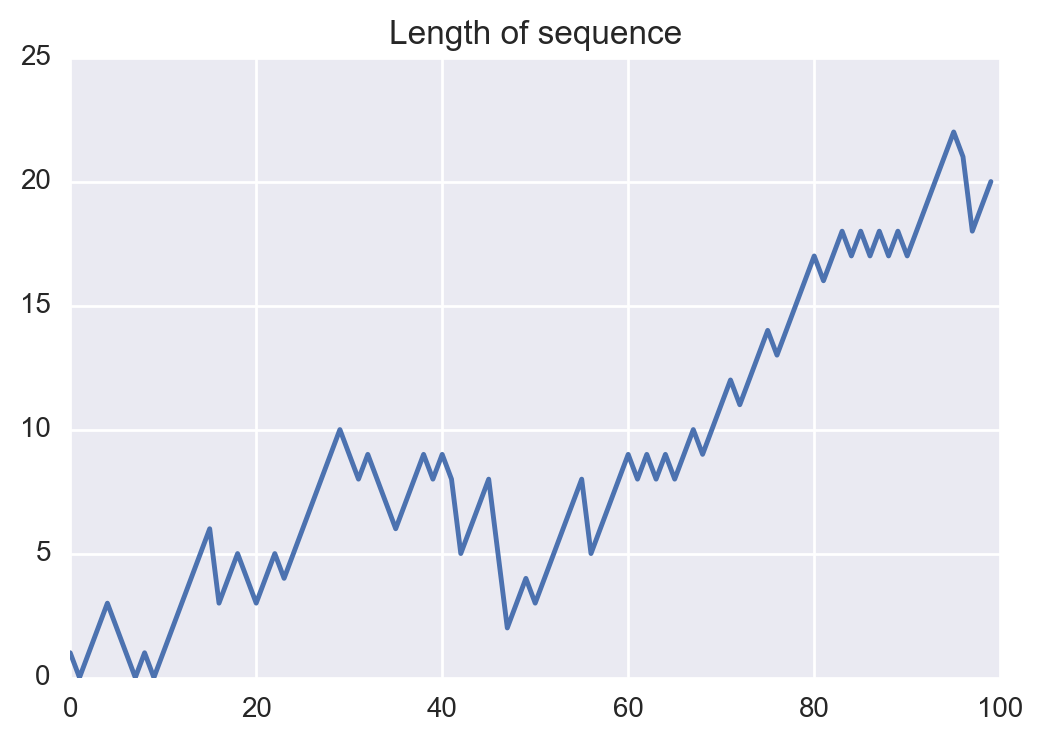

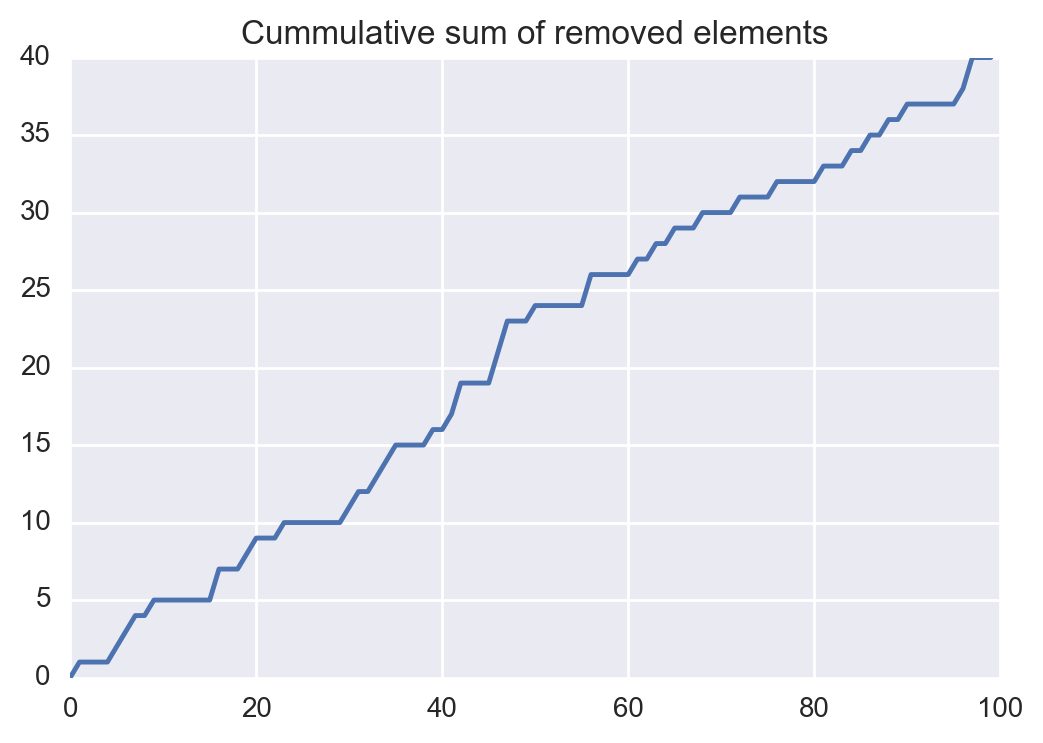

In [409]:
plot_results(*play(100, ['a', 'b', 'c', 'd']))

# Game for alphabet of length 5

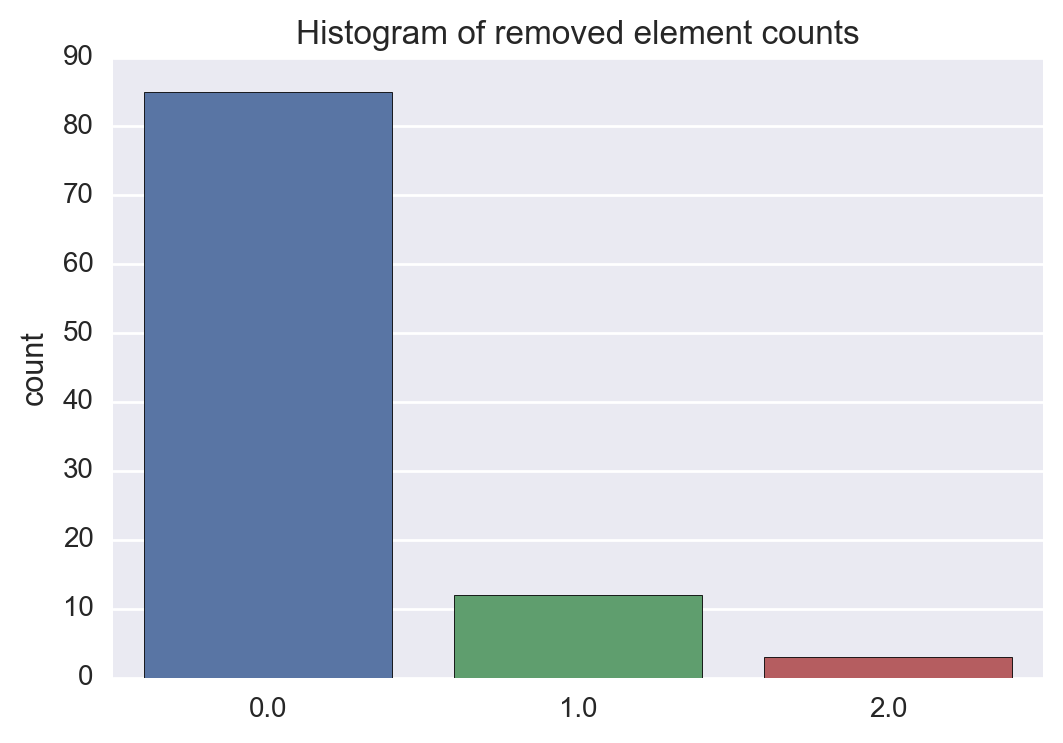

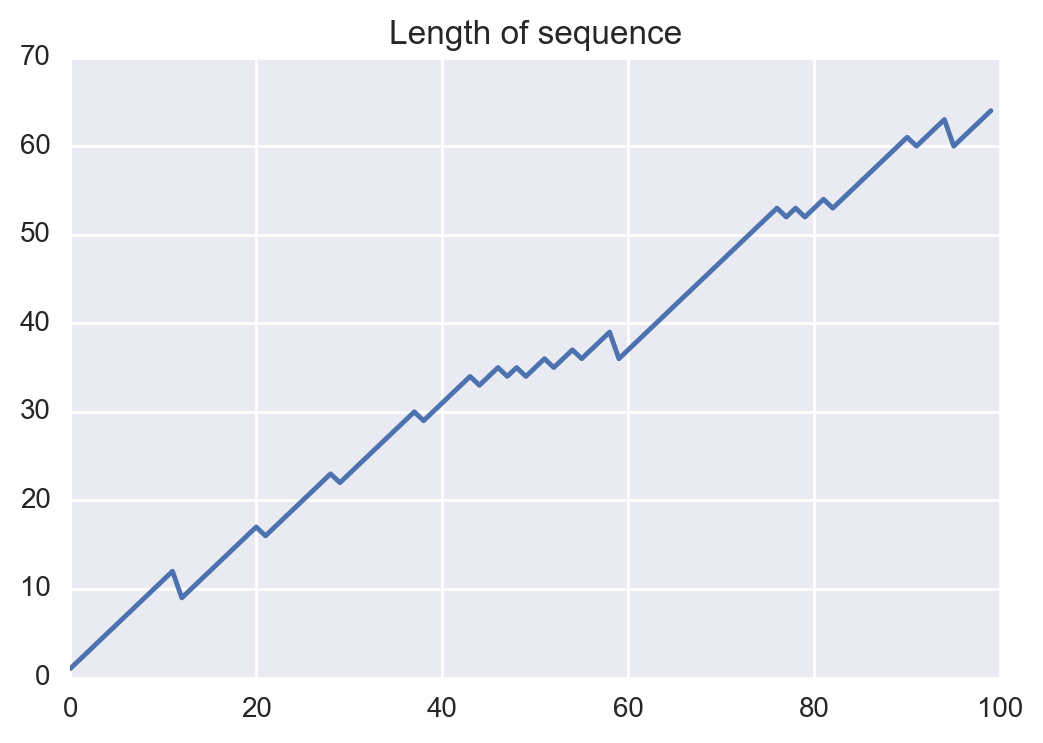

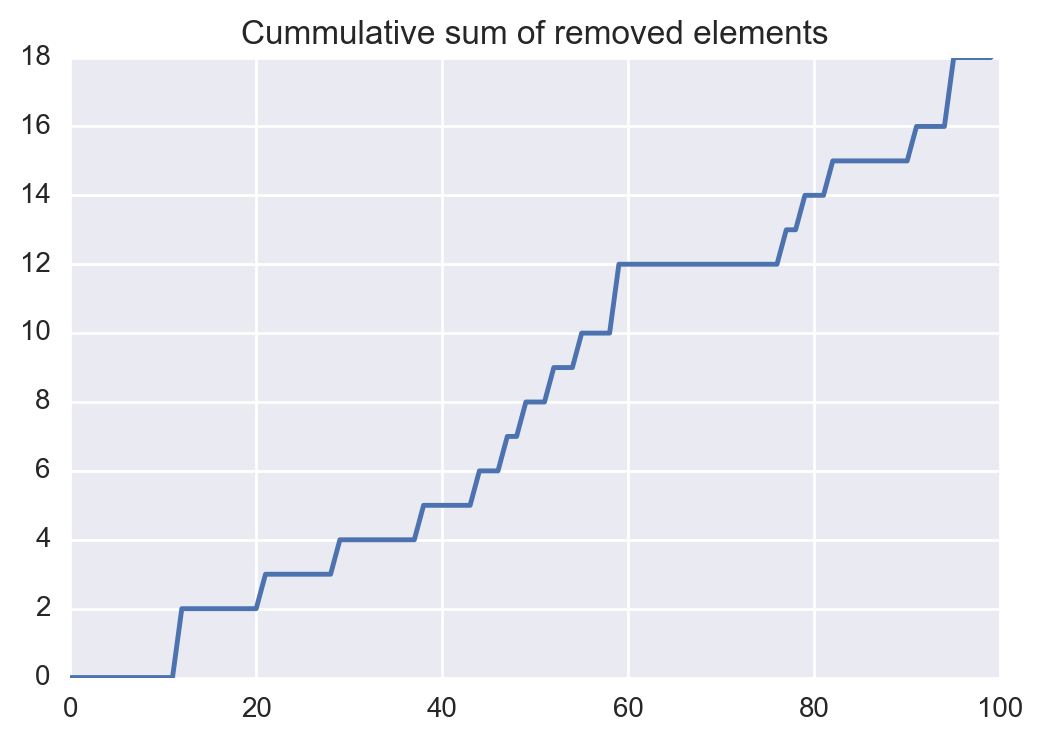

In [410]:
plot_results(*play(100, ['a', 'b', 'c', 'd', 'e']))

# Game for alphabet of length 6

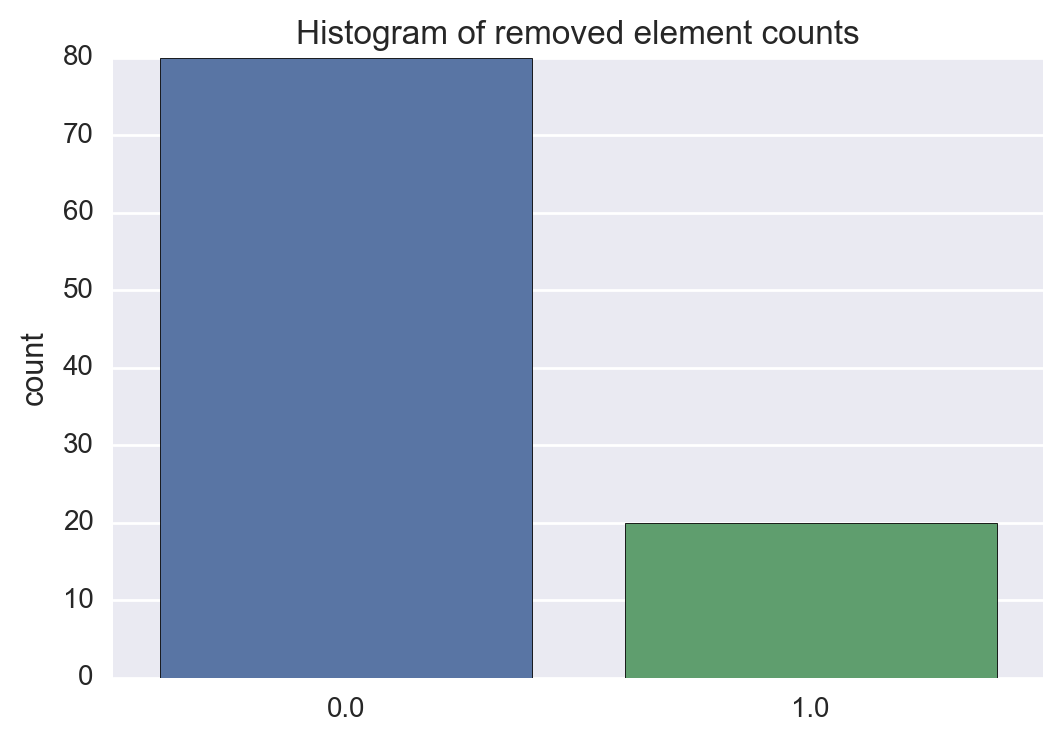

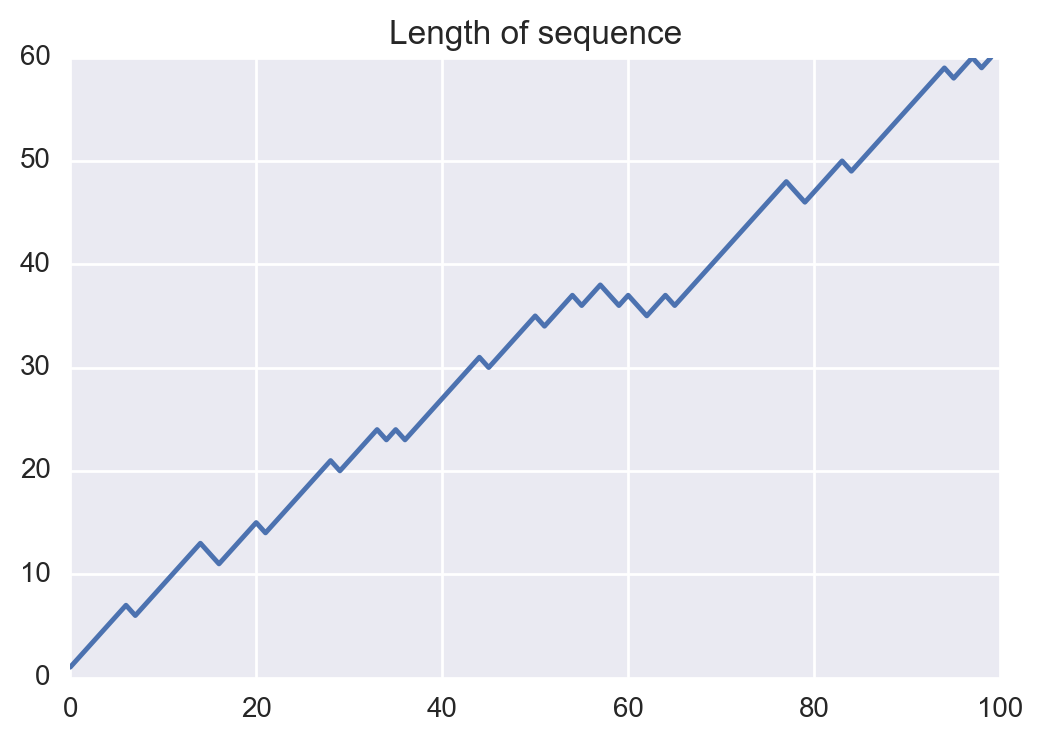

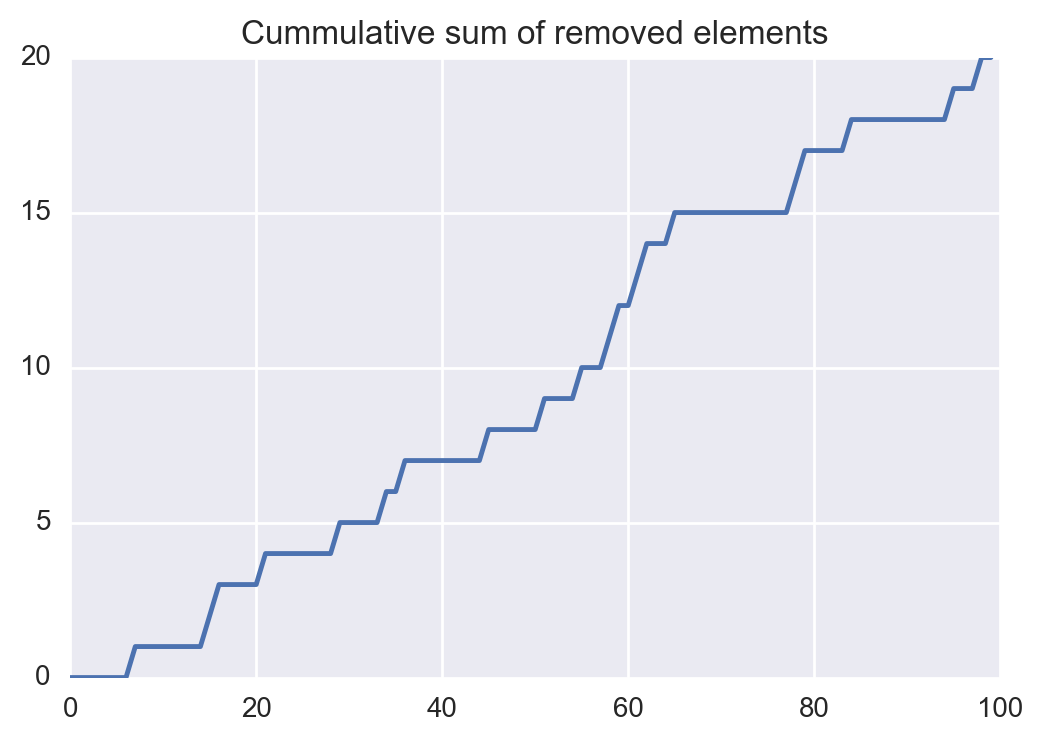

In [411]:
plot_results(*play(100, ['a', 'b', 'c', 'd', 'e', 'f']))